In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from utils.arch.anomalies import shock_mean_fn, shock_volatility_fn, perturbed_mean_fn, increasing_volatility_fn, constant_mean, extra_perturbed_mean_fn, double_volatility_fn, deterministic_volatility
from utils.simulate_markov import simulate_arch_1_process, simulate_arch1_process_with_dynamic_anomaly
from utils.markov_depth import calculate_markov_tukey_depth_for_trajectories_using_sample_trajectories, NADARAYA_WATSON
from utils.experiments.dd_plots import obtain_dd_plot

# Markovian DD-plots for visualization

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [3]:
# Fix the random seed for reproducibility 
random_seed = 7
np.random.seed(random_seed)

In [4]:
# Max Number of steps on each trajectory
n_steps = 200
min_n_steps = 50
# Number of steps of the initial long trajectory.
# Used for the initial kernel estimation.
n_steps_long = n_steps*5
# Number of trajectories to simulate in group X
M = 50
# Number of trajectories to simulate in group Y
A = 50

# Bandwidth parameter for the kernel estimation
inverse_bandwidth = np.power(n_steps_long, 1/5)

In [5]:
# Parameters of the ARCH(1) process (X)
INITIAL_VALUE = 0.5

def mean_fn(x):
    return 1 / (1 + np.exp(-x))

def volatility_fn(x):
    return norm.pdf(x + 1.2) + 1.5 * norm.pdf(x - 1.2)

In [6]:
# Simulate  ARCH(1) processes (X)
random_seed +=1
x_trajectories = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE,
    num_processes=M, 
    min_n_step=min_n_steps,
    seed=random_seed,
)

## Case where both set of trajectories come from the same distribution

In [7]:
# Simulate  ARCH(1) processes (Y)
random_seed +=1
y_arch_trajectories_same_dist = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    min_n_step=min_n_steps,
    seed=random_seed,
)

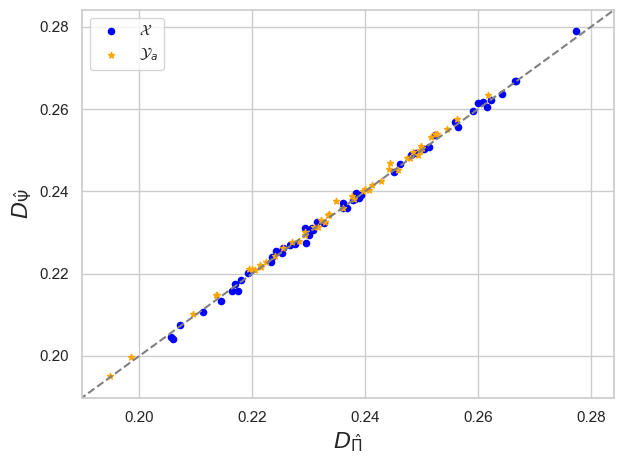

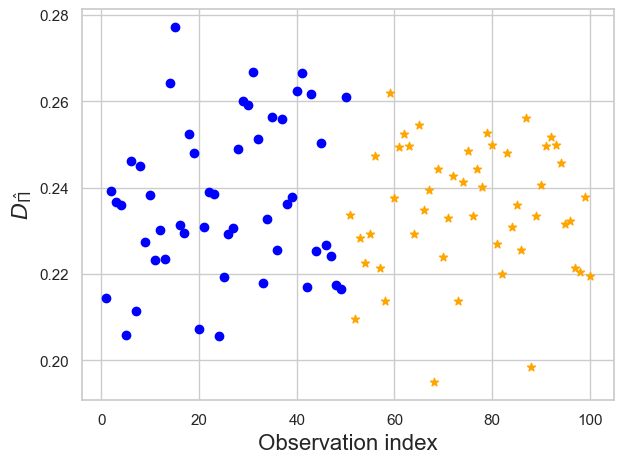

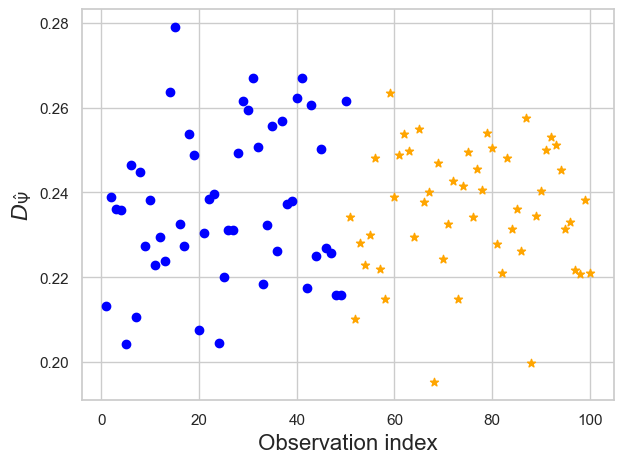

In [8]:
_=obtain_dd_plot(x_trajectories=x_trajectories, y_trajectories=y_arch_trajectories_same_dist, marginal_cdf_estimator=NADARAYA_WATSON, index="a")

## Slightly different mean, same volatility

In [9]:
# Simulate  ARCH(1) processes (Y)
random_seed +=1
y_arch_trajectories_perturbed_mean = simulate_arch_1_process(
    n_steps=n_steps, 
    m=perturbed_mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    min_n_step=min_n_steps,
    seed=random_seed,
)

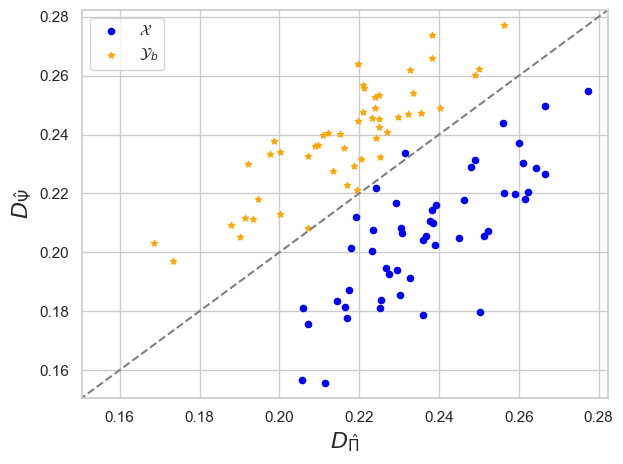

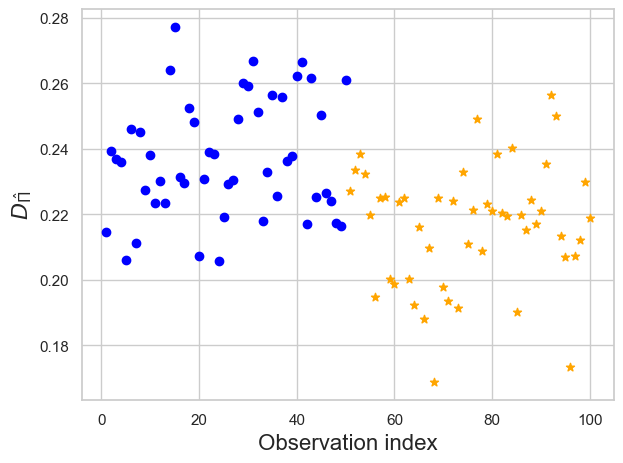

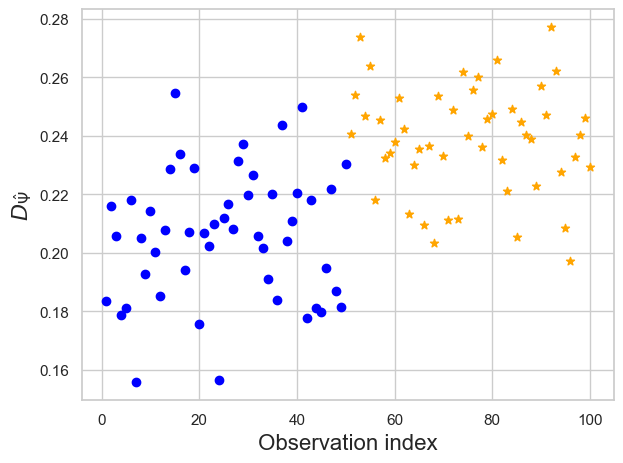

In [10]:
_=obtain_dd_plot(x_trajectories=x_trajectories, y_trajectories=y_arch_trajectories_perturbed_mean, marginal_cdf_estimator=NADARAYA_WATSON, index="b")

## Extra perturbed mean

In [11]:
# Simulate  ARCH(1) processes (Y)
random_seed +=1
y_arch_trajectories_extra_perturbed_mean = simulate_arch_1_process(
    n_steps=n_steps, 
    m=extra_perturbed_mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    min_n_step=min_n_steps,
    seed=random_seed,
)

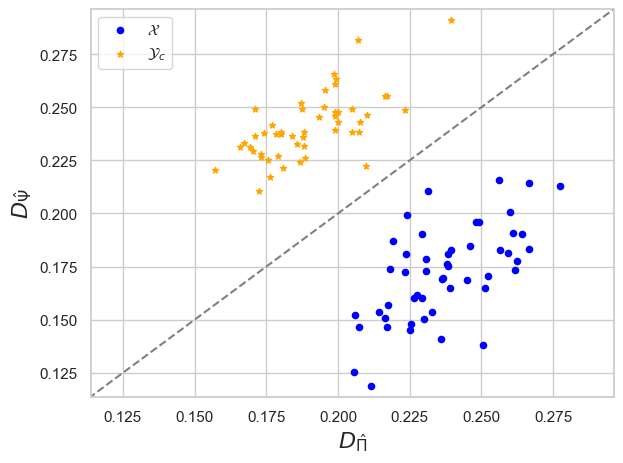

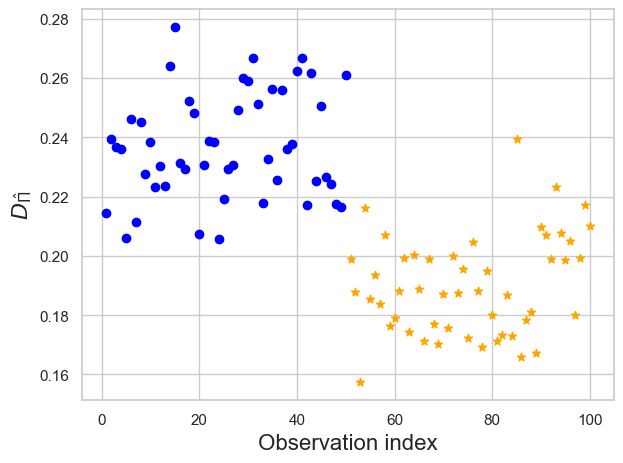

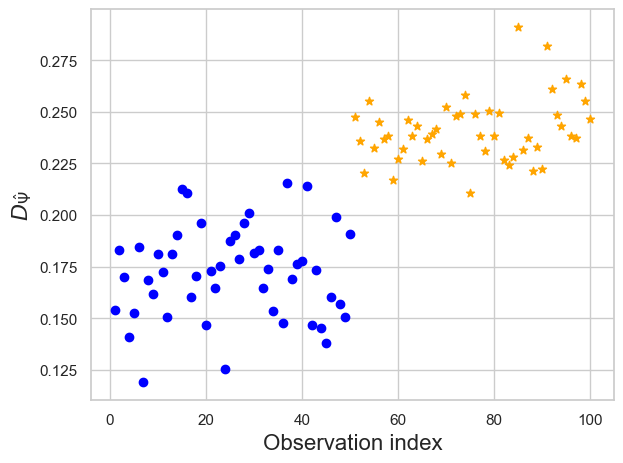

In [12]:
_=obtain_dd_plot(x_trajectories=x_trajectories, y_trajectories=y_arch_trajectories_extra_perturbed_mean, marginal_cdf_estimator=NADARAYA_WATSON, index="c")

## Constant volatility

In [13]:
# Simulate  ARCH(1) processes (Y)
random_seed +=1
y_arch_trajectories_constant_vol = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=deterministic_volatility, 
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    min_n_step=min_n_steps,
    seed=random_seed,
)

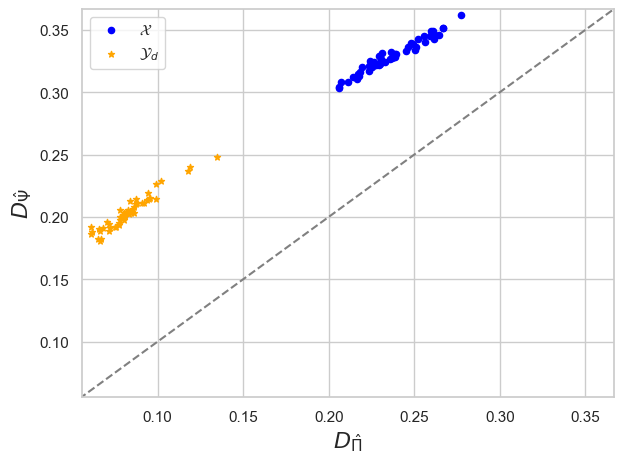

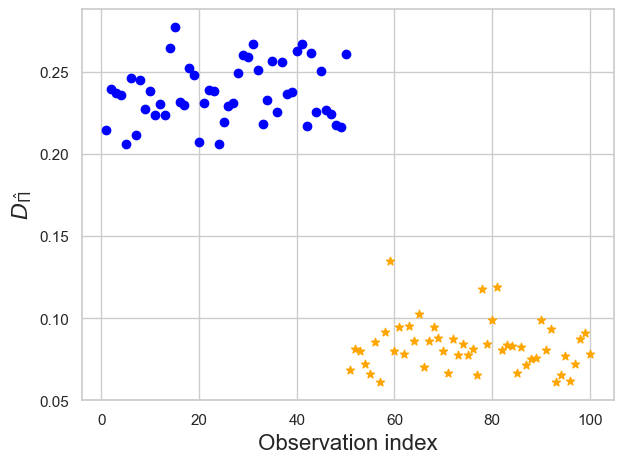

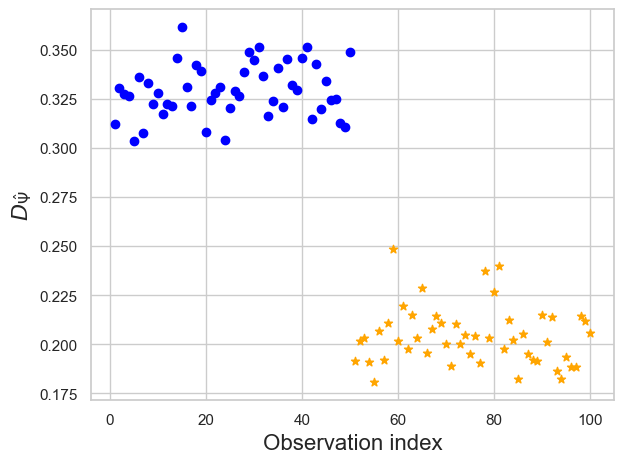

In [14]:
depths_x, depths_y=obtain_dd_plot(x_trajectories=x_trajectories, y_trajectories=y_arch_trajectories_constant_vol, marginal_cdf_estimator=NADARAYA_WATSON, index="d")